<h3> Use Real Phenotypes on 2706 training samples, July 16th </h3>
instead of using simulated phenotypes. 

In [137]:
import numpy as np
import pandas as pd
import magenpy as mgp
import viprs as vp
import subprocess
import io
from viprs.eval.metrics import r2 
from data.utils.Simulate_training import ELBO_plot
from data.utils.Simulate_training import *
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

<h5> For chr22, shuffled 500 SNPs  </h5>

In [138]:
# real_phe for 2706 samples
real_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/shuffle_500snps",
    phenotype_file="data/phenotype_data/DREAM_pheno_Full.csv",
)
#"Toy_example_expr/phenotype/shuffle500_phe.csv"

real_gdl.perform_gwas()
real_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/shuffle_500snps.sumstats", sep="\t", index=False
)
real_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/shuffle500_chr22_out/')

realTrain_gdl, realVal_gdl = real_gdl.split_by_samples(proportions=[.8, .2])

> Reading BED file...
> Reading phenotype file...
> Performing GWAS...


Exception ignored in: <finalize object at 0x7f3484480f70; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_1tw8nmz5'
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [139]:
print(realTrain_gdl.sample_size)
print(realVal_gdl.sample_size)

2160
546


In [165]:
v = vp.VIPRS(realTrain_gdl, fix_params={'pi': 0.998, 'sigma_epsilon': 0.750}) 
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 23%|██▎       | 227/1000 [00:00<00:02, 370.37it/s]

Converged at iteration 228 | ELBO: -2826.947396
> Final ELBO: -2826.947396
> Estimated heritability: 0.226304
> Estimated proportion of causal variants: 0.998000


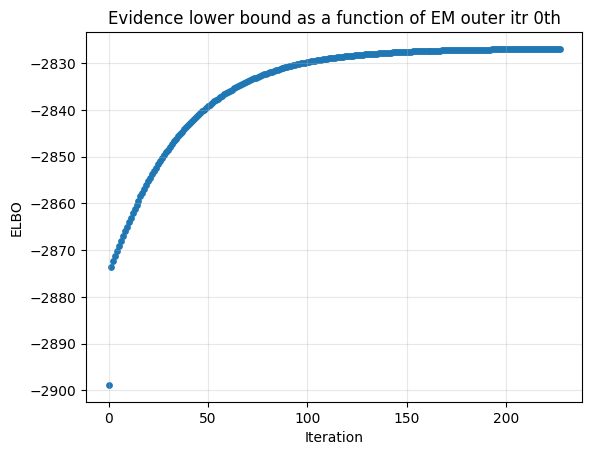

In [166]:
ELBO_plot(v.history['ELBO'], "Real_phe_expr/ELBO_plots/real_500SNPs_chr22.png",itr=0)

In [167]:
pred = v.predict(realVal_gdl)

> Generating polygenic scores...


In [168]:
r2(pred, realVal_gdl.sample_table.phenotype)

0.09562443186573269

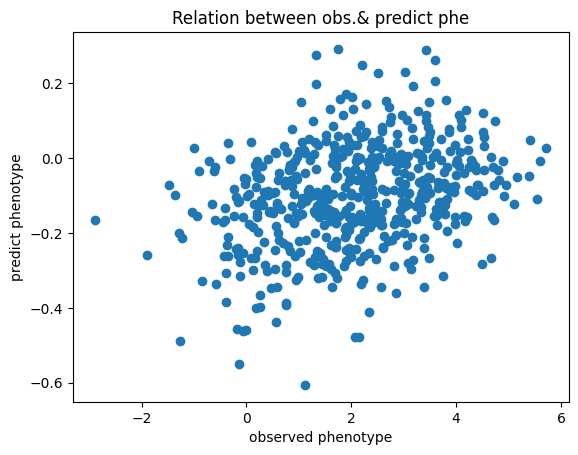

In [169]:
plot_obs_vs_pred(realVal_gdl.sample_table.phenotype, pred)

In [145]:
pred.shape
realTrain_gdl.to_phenotype_table()

,FID,IID,phenotype
0,0,1000,1.800000
1,0,2000,2.130000
2,0,4000,2.540000
3,0,6000,0.900000
4,0,10000,0.570000
...,...,...,...
2155,0,3058000,1.721122
2156,0,3059000,0.074294
2157,0,3062000,3.914104
2158,0,3065000,1.029280


In [146]:
v.get_heritability()
v.get_proportion_causal()
v.get_sigma_beta()

0.00028265568807249084

In [147]:
v.get_average_effect_size_variance()

0.00028209037669634586

In [148]:
a = v.history['ELBO']
a

[-2969.2648512614987,
 -2957.2214749523487,
 -2957.7025287012184,
 -2958.674202676901,
 -2959.6215789376806,
 -2960.533541603259,
 -2961.414080967674,
 -2962.2653099785157,
 -2963.0886657575547,
 -2963.8853914212373,
 -2964.656640050394,
 -2965.403497394575,
 -2966.126989347822]

<h5> Use Grid to find the suitable sigma epsilon and pi </h5>


Simulated phenotpyes

In [149]:
beta500np = np.zeros(500)
beta500np[0:2] = 0.2     # rs11090428
beta500np[2:6] = 0.1/3
beta500 = {22: beta500np}
g_sim = mgp.GWASimulator("CMAll_qced/chr22/shuffle_500snps",
                        pi = [.99, .01],
                        h2=0.5)
g_sim.set_beta(beta500)
g_sim.simulate(reset_beta=False)
# g_sim.simulate()
g_sim.to_phenotype_table().to_csv("Toy_example_expr/phenotype/shuffle500_phe.csv",sep='\t')

> Reading BED file...
> Generating polygenic scores...


In [150]:
# simulation on 2706
sim500_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/shuffle_500snps",
    phenotype_file="Toy_example_expr/phenotype/shuffle500_phe.csv",
)

sim500_gdl.perform_gwas()
sim500_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/shuffle_500snps.sumstats", sep="\t", index=False
)
sim500_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/shuffle500_chr22_out/')


> Reading BED file...
> Reading phenotype file...
> Performing GWAS...


Exception ignored in: <finalize object at 0x7f34710b0e10; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_huxhrh3y'
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Create grid

In [155]:
# Create a grid:
grid = vp.HyperparameterGrid()
# Generate a grid for pi using 5 equidistant grid points:
grid.generate_pi_grid(steps=5, n_snps=realTrain_gdl.n_snps)
# Generate a grid for sigma epsilon using 5 equidistant grid points:
grid.generate_sigma_epsilon_grid(steps=5)

In [156]:
vgv_gs = vp.VIPRSGridSearch(realTrain_gdl, grid)
vgv_gs = vgv_gs.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 0/1000 [00:00<?, ?it/s]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Stopping at iteration 2 for model 0: The optimization algorithm is not converging!
Previous ELBO: 2652493086.521338 | Current ELBO: 5776970930.337465
  
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Stopping at iteration 2 for model 1: The optimization algorithm is not converging!
Previous ELBO: 2652493110.613788 | Current ELBO: 5776970992.702309
  
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Stopping at iteration 2 for model 2: The optimization algorithm is not converging!
Previous ELBO: 2652491957.010662 | Current ELBO: 5776969964.976926
  
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Stopping at iteration 2 for model 3: The optimization algorithm is not co

Model 22 converged at iteration 2 || ELBO: -3064.906754
Model 23 converged at iteration 2 || ELBO: -3064.906754
Model 24 converged at iteration 2 || ELBO: -3064.906754


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Iteration 11 | Model 20: ELBO dropped from -3064.906755 to -3064.906755.
  
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Iteration 11 | Model 21: ELBO dropped from -3064.906754 to -3064.906755.
  
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Iteration 12 | Model 20: ELBO dropped from -3064.906755 to -3064.906755.
  
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The optimization for model 20 is halted due to numerical instabilities!
  
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Iteration 12 | Model 21: ELBO dropped from -3064.906755 to -3064.906755.
  
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launche

 27%|██▋       | 273/1000 [00:01<00:05, 142.61it/s]

Model 19 converged at iteration 254 || ELBO: -2826.907445


 53%|█████▎    | 530/1000 [00:03<00:03, 148.68it/s]

Model 15 converged at iteration 505 || ELBO: 18225.703637


 65%|██████▍   | 649/1000 [00:04<00:02, 164.30it/s]

Model 18 converged at iteration 627 || ELBO: 58082.640573


100%|██████████| 1000/1000 [00:06<00:00, 154.47it/s]

> Optimization is complete for all 25 models.


In [157]:
vgv_gs.select_best_model(validation_gdl=realVal_gdl, criterion='validation')

> Generating polygenic scores...
> Based on the validation criterion, selected model: 19
> Model details:

sigma_epsilon       0.750000
pi                  0.998000
ELBO            -2826.908391
Validation_R2       0.095625
Name: 19, dtype: float64


In [158]:
# r2(vgv_gs.predict(sim500_gdl), sim500_gdl.sample_table.phenotype)